# Mini Project 3 - II. Dimensional Reduction
Apply dimensionality reduction using PCA and select only the two most important components from the word embedding, and plot each word representation on a 2D graph.

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Load Word Embeddings

In [2]:
file_word_embbedings = "I_word_to_embedding4.npy" # Change as you prefer

In [4]:
word_to_embeddings = np.load(file_word_embbedings, allow_pickle=True).item()
word_to_embeddings

{'<UNK>': array([ 0.17700568,  0.167575  , -0.4565982 , -0.12468477, -0.16406532,
        -0.2894348 ,  0.10196926, -0.16389488,  0.11904307,  0.2527621 ,
        -0.5365126 ,  0.14401014,  0.09015285, -0.07594073, -0.20686638,
         0.14518945,  0.18605575,  0.12100258,  0.12381797,  0.24827866,
        -0.1160071 , -0.21443748, -0.15278058, -0.17781441, -1.0892442 ,
        -0.12274525,  0.19193815, -0.13220717,  0.14577834, -0.4401892 ,
         0.23904003,  0.37154558, -0.15388237, -0.24147114,  0.35301903,
         0.1357985 , -0.09185273,  0.3691543 , -0.11072241,  0.28609943,
        -0.18654402, -0.2582477 , -0.14672914, -0.1396053 ,  0.10261047,
        -0.08844615, -0.41337252, -0.3633192 ,  1.3828644 ,  0.25987756],
       dtype=float32),
 'ឬ': array([-0.52396274,  0.10379477, -0.3350835 , -0.51454204,  0.1473687 ,
         0.10425425, -0.8012706 , -0.2076964 , -0.24390541, -0.03804474,
        -0.23433842, -1.0017115 ,  0.60725194, -0.19806425, -0.04846774,
        -0.39

In [5]:
word_to_index = np.load("I_word_to_index.npy", allow_pickle=True).item()

In [6]:
index_to_word = {v: k for k, v in word_to_index.items()}
vocabs = word_to_index.keys()

len(vocabs), word_to_index, index_to_word

(175,
 {'<UNK>': 0,
  'ឬ': 1,
  'ផ្លូវ': 2,
  'ចំនួន': 3,
  'ពួក': 4,
  'នគរ': 5,
  'ដំបូល': 6,
  'ដើម្បី': 7,
  'បង្ហាញ': 8,
  'ព្រះបាទ': 9,
  'ភាគ': 10,
  'ខាង': 11,
  'ថ្ម': 12,
  'នៅ': 13,
  'អង្គរវត្ត': 14,
  'កន្លែង': 15,
  'បី': 16,
  'នៅក្នុង': 17,
  'ស្រុក': 18,
  'សម័យ': 19,
  'លោក': 20,
  'ភក់': 21,
  'ព្រះវិស្ណុ': 22,
  'ជាប់': 23,
  'ប៉ម': 24,
  'កំពែង': 25,
  'ខាងត្បូង': 26,
  'របស់': 27,
  'ពាក្យ': 28,
  'ឡើយ': 29,
  'រួម': 30,
  'ហៅ': 31,
  'កណ្តាល': 32,
  'នូវ': 33,
  'គឺ': 34,
  'ខាងជើង': 35,
  'ចំពោះ': 36,
  'តូច': 37,
  'ត្រូវបាន': 38,
  'វរ្ម័ន': 39,
  'ម៉ែត្រ': 40,
  'សាសនា': 41,
  'ខាងលិច': 42,
  'វិញ': 43,
  'អាច': 44,
  'ជាច្រើន': 45,
  'ខ្លួន': 46,
  'លើ': 47,
  'ទាំង': 48,
  'ទៅ': 49,
  'តំណាង': 50,
  'ទេ': 51,
  'អ្នក': 52,
  'ក្នុង': 53,
  'ទីក្រុង': 54,
  'គេ': 55,
  'ផ្នែក': 56,
  'ទេសចរណ៍': 57,
  'រាជធានី': 58,
  'មាន': 59,
  'ប្រើ': 60,
  'ប្រទេស': 61,
  'ពី': 62,
  'កម្ពុជា': 63,
  'យ៉ាង': 64,
  'ធ្វើ': 65,
  'ស្រាល': 66,
  'ខាងកើត': 67,
  'ប្រជាជន': 6

In [7]:
# Create an array of array 50-dimensional with zeros
embeddings_array = np.zeros((len(word_to_embeddings), 50))

for word, embedding in word_to_embeddings.items():
    index = word_to_index[word]
    embeddings_array[index] = embedding

embeddings_array

array([[ 0.17700568,  0.167575  , -0.45659819, ..., -0.36331919,
         1.38286436,  0.25987756],
       [-0.52396274,  0.10379477, -0.33508351, ..., -0.21254343,
         0.18124491, -0.00421848],
       [ 0.68996924, -0.31943733,  0.23552766, ...,  0.40455407,
         0.17505044, -0.34202713],
       ...,
       [ 0.27136925,  0.39427167,  0.01233269, ..., -0.446789  ,
         0.12509896,  0.54302114],
       [-0.41140708,  0.17523365, -0.01412673, ..., -0.38838515,
         0.4091903 , -0.31206805],
       [ 0.17653717, -0.24588977, -0.43444896, ...,  0.04948792,
        -0.01961078, -0.11755933]])

### Apply PCA

In [8]:
# Fit PCA on the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_array)

#### Plot the graph

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

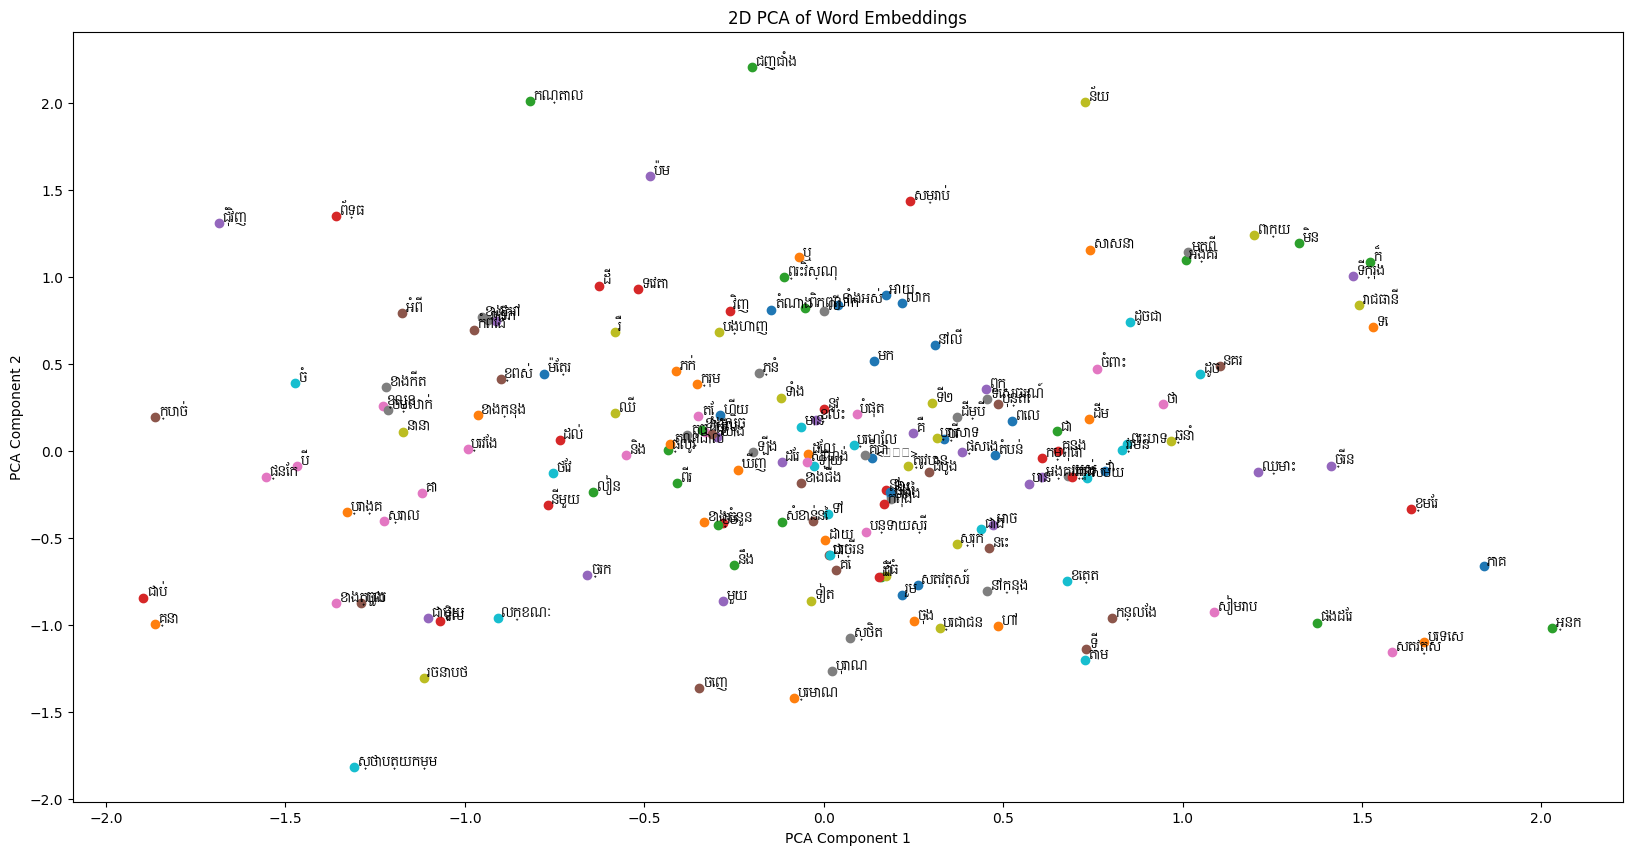

In [9]:
import pathlib

plt.figure(figsize=(20, 10))
for i, embedding in enumerate(reduced_embeddings):
    word = index_to_word[i]
    x, y = embedding
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9, font=pathlib.Path('KhmerOSContent-Regular.ttf'))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Word Embeddings')
plt.show()